In [0]:
import numpy as np
import csv
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [0]:
import time
def print_time(start_time, opeartion='Operation'):
    total = time.time() - start_time
    print('In total,', opeartion, 'takes:', int(total/60), 'minute and', int(total%60), 'seconds')

In [0]:
df = pd.read_csv('donorschoose_new_doc2vec_dbow.csv')

In [20]:
df_small = df.sample(20000)
print(collections.Counter(df_small['poverty_level']))
print(collections.Counter(df_small['grade_level']))
print(collections.Counter(df_small['primary_focus_area']))

Counter({'highest poverty': 11893, 'high poverty': 4880, 'moderate poverty': 2709, 'low poverty': 518})
Counter({'Grades PreK-2': 6405, 'Grades 3-5': 6122, 'Grades 6-8': 3906, 'Grades 9-12': 3567})
Counter({'Literacy & Language': 8053, 'Math & Science': 5681, 'Music & The Arts': 1825, 'Special Needs': 1396, 'Applied Learning': 1275, 'History & Civics': 943, 'Health & Sports': 826, nan: 1})


In [21]:
start_time = time.time()
tsne = TSNE(n_components=2
           ,learning_rate=1000
           ,perplexity=145
           ,n_iter=3000)
X_tsne = tsne.fit_transform(df_small.iloc[:,:300])
print_time(start_time)

In total, Operation takes: 22 minute and 56 seconds


Counter({'Grades PreK-2': 6405, 'Grades 3-5': 6122, 'Grades 6-8': 3906, 'Grades 9-12': 3567})


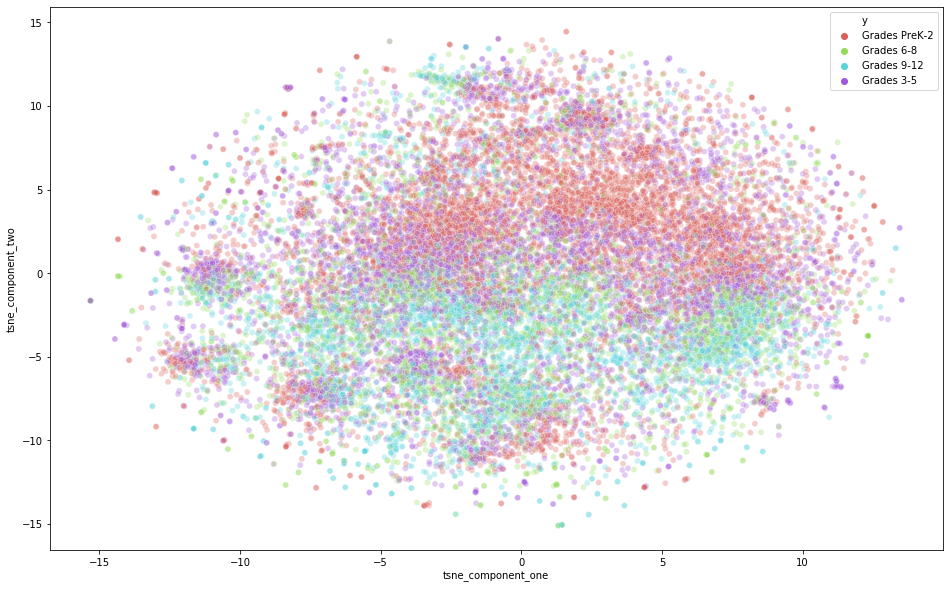

In [22]:
df_subset = pd.DataFrame()
df_subset['y'] = df_small['grade_level']
print(collections.Counter(df_small['grade_level']))
df_subset['tsne_component_one'] = X_tsne[:,0]
df_subset['tsne_component_two'] = X_tsne[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne_component_one', y='tsne_component_two',
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=0.3
)

Counter({'highest poverty': 11893, 'high poverty': 4880, 'moderate poverty': 2709, 'low poverty': 518})


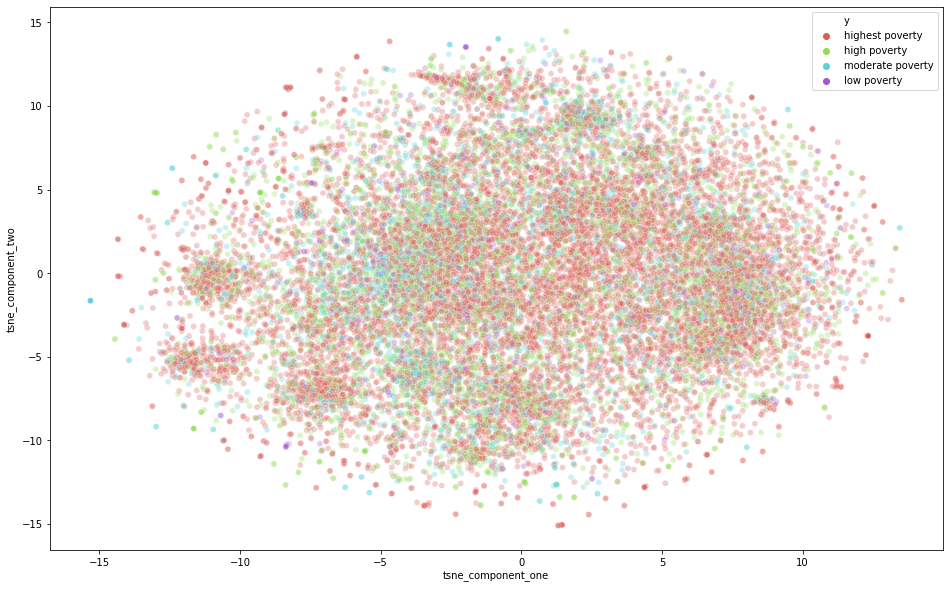

In [23]:
df_subset['y'] = df_small['poverty_level']
print(collections.Counter(df_small['poverty_level']))
df_subset['tsne_component_one'] = X_tsne[:,0]
df_subset['tsne_component_two'] = X_tsne[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne_component_one', y='tsne_component_two',
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=0.3
)

Counter({'Literacy & Language': 8053, 'Math & Science': 5681, 'Music & The Arts': 1825, 'Special Needs': 1396, 'Applied Learning': 1275, 'History & Civics': 943, 'Health & Sports': 826, nan: 1})


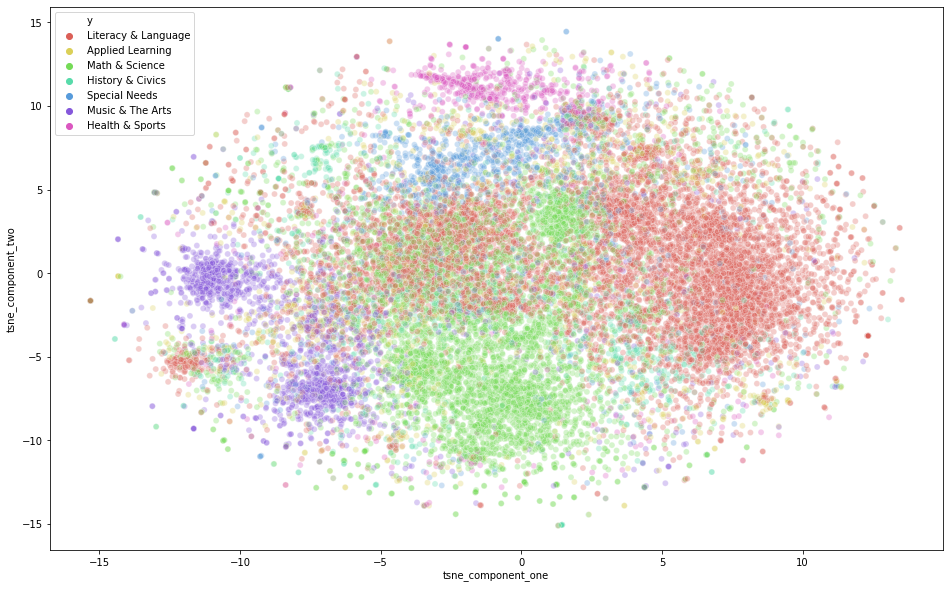

In [24]:
df_subset['y'] = df_small['primary_focus_area']
print(collections.Counter(df_small['primary_focus_area']))
df_subset['tsne_component_one'] = X_tsne[:,0]
df_subset['tsne_component_two'] = X_tsne[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne_component_one', y='tsne_component_two',
    hue="y",
    palette=sns.color_palette("hls", 7),
    data=df_subset,
    legend="full",
    alpha=0.3
)